<table>
 <tr align=left><td><img align=left src="https://i.creativecommons.org/l/by/4.0/88x31.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

In [4]:
%matplotlib inline
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt

# Parabolic Equations

We now finally turn to combining what we learned for spatial discretizations with boundary value problems with temporal discretizations for initial value problems.  The first type of equations we will study are parabolic equations for which the heat equation
$$
    u_t = \kappa u_{xx}
$$
will serve as our focus.  Many of the general properties of the numerical methods we will derive for the heat equation will extend for many other parabolic equations as well.

Along with the equation above we also need boundary conditions
$$\begin{aligned}
    u(0, t) &= g_0(t) \quad \text{for} \quad &t > 0 & \text{   and} \\
    u(1, t) &= g_1(t) \quad \text{for} \quad &t > 0 &
\end{aligned}$$
along with the initial condition
$$
    u(x, 0) = u_0(x).
$$
Here we have assumed that our domain $\Omega = [0, 1]$, $t_0 = 0$, and that we have Dirichlet boundary conditions (we will see other implementations later).

We also will discretize the space-time domain such that
$$
    x_i = i \Delta x \quad \quad t_n = n \Delta t
$$
and that our numerical discretization $U$ will approximate the true function $u$ at a point $(x_i, t_n)$ such that
$$
    U^n_i \approx u(x_i, t_n).
$$

As a first attempt at discretizing the heat equation let's use forward Euler to discretize in time and a 2nd order, centered difference in space to find
$$
    \frac{U^{n+1}_i - U^n_i}{\Delta t} = \frac{1}{\Delta x^2} (U^n_{i-1} - 2 U^n_i + U^n_{i+1})
$$
or in update form
$$
    U^{n+1}_i = U^n_i + \frac{\Delta t}{\Delta x^2} (U^n_{i-1} - 2 U^n_i + U^n_{i+1}).
$$

One way to look at this discretization is to consider this again as an initial value problem so that
$$
    U^{n+1}_i = U^n_i + \Delta t f(t_n, U^n_i)
$$
where now the spatial discretization is contained in $f$ so that in the case above we have
$$
    f(t_n, U^n_i) = \frac{1}{\Delta x^2} (U^n_{i-1} - 2 U^n_i + U^n_{i+1})
$$
providing us the means for analyzing this method in the context of initial value problem numerical methods.

Another method that uses only one-step but is more practical as we shall see is called the *Crank-Nicholson* method.  This method is based on a trapezoidal method discretization such that
$$\begin{aligned}
    \frac{U^{n+1}_i - U^n_i}{\Delta t} &= \frac{1}{2} (f(U^n_i) + f(U^{n+1}_i)) \\
    &= \frac{1}{2} \frac{U^n_{i-1} - 2 U^n_i + U^n_{i+1} + U^{n+1}_{i-1} - 2 U^{n+1}_i + U^{n+1}_{i+1}}{\Delta x^2} \Rightarrow \\
    U^{n+1}_i &= U^n_i + \frac{\Delta t}{2 \Delta x^2} (U^n_{i-1} - 2 U^n_i + U^n_{i+1} + U^{n+1}_{i-1} - 2 U^{n+1}_i + U^{n+1}_{i+1})
\end{aligned}$$

Try drawing the stencil of this method.

From the update formula we can do a bit of algebra to find
$$
    -r U^{n+1}_{i-1} + (1 + 2r) U^{n+1}_i - r U^{n+1}_{i+1} = r U^{n}_{i-1} + (1 - 2r) U^{n}_{i} + r U^{n}_{i+1}
$$
where $r = \frac{\Delta t}{2 \Delta x^2}$.

Try writing out the system of equations for this if we have $m=5$.

This forms a tridiagonal system of equations of the form $A U^{n+1} = f(t_n, U^n)$ where
$$
    A = \begin{bmatrix}
        1+2r & -r \\
        -r & 1+2r & -r \\
        & -r & 1+2r & -r \\
        & & \ddots & \ddots & \ddots \\
        & & & -r & 1+2r & -r \\
        & & & & -r & 1+2r
    \end{bmatrix}
$$
$$
    f(t_n, U^{n}) = \begin{bmatrix}
        r (g_0(t_n) + g_0(t_{n+1})) + (1 - 2r) U^n_1 + r U^n_2 \\
        r U^n_1 + (1-2r) U^n_2 + r U^n_3 \\
        r U^n_2 + (1-2r) U^n_3 + r U^n_4 \\
        \vdots \\
        r U^n_{m-2} + (1-2r) U^n_{m-1} + r U^n_m \\
        r U^n_{m-1} + (1-2r) U^n_m + r(g_1(t_n) + g_1(t_{n+1}))
    \end{bmatrix}
$$

From our discussions of iterative methods we may be able to solve this in $\mathcal{O}(m)$ steps making the Crank-Nicholson method for the heat equation as efficient as our explicit method above.  The advantage of the implicit method is that it allows for much larger time steps than the explicit method due to stability constraints which we will look at in detail (the heat equation can be considered a stiff system of ODEs).

## Local Truncation Error

Local truncation error $\tau^n$ is again calculated the same as before except now we need to deal with both the temporal and spatial derivatives.  We still will follow the same procedure as before, plugging in the true solution $u(x,t)$ into the appropriate discretization and use Taylor expansions to find the dominate error term.

As an example consider the explicit method developed above.  We now have
$$
    \tau^n_i = \tau(x_i, t_n) = \frac{u(x, t + \Delta t) - u(x, t)}{\Delta t} - \frac{1}{\Delta x^2} (u(x - \Delta x, t) - 2 u(x, t) + u(x + \Delta x, t))
$$

The relevant Taylor expansions are
$$\begin{aligned}
    u(x, t + \Delta t) &= u(x,t) + u_t(x,t) \Delta t + \frac{\Delta t^2}{2} u_{tt}(x,t) + \frac{\Delta t^3}{6} u_{ttt}(x,t) + \mathcal{O}(\Delta t^4) \\
    u(x \pm \Delta x, t) &= u(x,t) \pm \Delta x u_x(x,t) + \frac{\Delta x^2}{2} u_{xx}(x,t) \pm \frac{\Delta x^3}{6} u_{xxx}(x,t) + \frac{\Delta x^4}{24} u_{xxxx}(x,t) + \mathcal{O}(\Delta x^5).
\end{aligned}$$

This leads to a truncation error of
$$\begin{aligned}
    \tau(x,t) &= \frac{1}{\Delta t} \left(u(x,t) + u_t(x,t) \Delta t + \frac{\Delta t^2}{2} u_{tt}(x,t) + \frac{\Delta t^3}{6} u_{ttt}(x,t) + \mathcal{O}(\Delta t^4) - u(x,t) \right ) \\
    & \quad - \frac{1}{\Delta x^2} \left (u(x,t) - \Delta x u_x(x,t) + \frac{\Delta x^2}{2} u_{xx}(x,t) - \frac{\Delta x^3}{6} u_{xxx}(x,t) + \frac{\Delta x^4}{24} u_{xxxx}(x,t) \right .\\
    & \quad - 2 u(x,t) \\
    & \quad \left .+ u(x,t) + \Delta x u_x(x,t) + \frac{\Delta x^2}{2} u_{xx}(x,t) + \frac{\Delta x^3}{6} u_{xxx}(x,t) + \frac{\Delta x^4}{24} u_{xxxx}(x,t) + \mathcal{O}(\Delta x^5)\right ) \\
    &= u_t(x,t)+ \frac{\Delta t}{2} u_{tt}(x,t) + \frac{\Delta t^2}{6} u_{ttt}(x,t) + \mathcal{O}(\Delta t^3)  - u_{xx}(x,t) - \frac{\Delta x^2}{24} u_{xxxx}(x,t) - \frac{\Delta x^2}{24} u_{xxxx}(x,t) + \mathcal{O}(\Delta x^5) \\
    &=  \frac{\Delta t}{2} u_{tt}(x,t) + \frac{\Delta t^2}{6} u_{ttt}(x,t) - \frac{\Delta x^2}{12} u_{xxxx}(x,t) + \mathcal{O}(\Delta x^4, \Delta t^2)
\end{aligned}$$

In order to simplify our expression for the truncation error we can differentiate the true solution via
$$
    (u_t)_t = (u_{xx})_t \rightarrow u_{tt} = (u_t)_{xx} = u_{xxxx}
$$
assuming the solution is smooth enough so that we can replace the temporal derivatives in our truncation error to find
$$\begin{aligned}
    \tau(x,t) &= \left ( \frac{\Delta t}{2} - \frac{\Delta x^2}{12} \right) u_{xxxx} + \mathcal{O}(\Delta t^2, \Delta x^4)
\end{aligned}$$
leading us to the conclusion that this method is first order in time and second order in space.  We see then that the explicit method above is at least consistent.

We can also show that the Crank-Nicholson method is second order in both time and space, i.e.
$$
    \tau(x,t) = \mathcal{O}(\Delta t^2, \Delta x^2).
$$

## Method of Lines

The *method of lines* refers to discretizing the spatial and temporal component of a PDE separately.  It is useful for analyzing methods as well as a straight-forward means to ensure a particular truncation error.  Above we have used this approach to the heat equation by discretizing the spatial derivative by a second order, centered approximation to the second derivative which leads to a system of ODEs, often called the *semi-discrete method*.

Looking back at our examples, a method of lines approach would give us the system
$$
    U_i'(t) = \frac{1}{\Delta x^2} (U_{i-1}(t) - 2 U_i(t) + U_{i+1}(t))
$$
which we can apply any IVP method to (and hence our two different approaches above).  

## Stability

With a method of lines perspective we can look at the discretization of the heat equation as being a question of whether $\Delta t \lambda = z$ lies within the stability region of the particular ODE method.  Now we see how the $\lambda$ of the spatial discretization can play an important role in the stability of the overall method approach.

For the heat equation with the centered, second order approximation we know that the eigenvalues of the matrix are
$$
    \lambda_p = \frac{2}{\Delta x^2} (\cos(p \pi \Delta x) - 1).
$$
As before when $\Delta x \rightarrow 0$ the eigenvalues continue to become larger along the negative real axis but the smallest eigenvalue remains stationary.  This lead us to conclude that the smaller $\Delta x$ became the BVP become more *stiff* and the same thing happens here.  In fact, in this case we see how this adversely effects our IVP approach.

For the heat equation the largest eigenvalue goes as
$$
    \lambda = -\frac{4}{\Delta x^2}
$$
so we require that 
$$
    z =  -\frac{4 \Delta t}{\Delta x^2}
$$
lie within the stability region of the IVP method we have chosen.

For the explicit method above we would require
$$
    |1 + \Delta t \lambda| \leq 1
$$
and therefore
$$
    \frac{\Delta t}{\Delta x^2} \leq \frac{1}{2}
$$

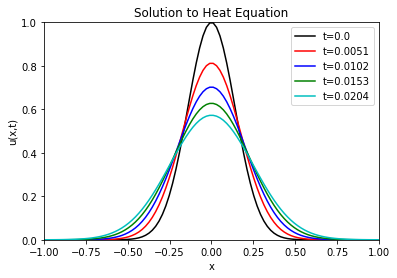

In [2]:
# Compute Heat Equation Solution using Forward Euler and 2nd-order Centered Approximations
# Spatial discretization
m = 100
x = numpy.linspace(-1.0, 1.0, m)
delta_x = 2.0 / (m - 1.0)

# Time discretization
delta_t = 0.5 * delta_x**2
N = 101
t = numpy.arange(0.0, N * delta_t, delta_t)

# Solution array
U = numpy.empty((N + 1, m))

# Initial and boundary conditions
U[0, :] = numpy.exp(-x**2 / 0.2**2)
g_0 = lambda t: 0.0
g_1 = lambda t: 0.0

# Time stepping loop
for n in range(len(t)):
    for i in range(1,len(x) - 1):
        U[n+1, i] = U[n, i] + delta_t / delta_x**2 * (U[n, i-1] - 2.0 * U[n, i] + U[n, i+1])
    # Boundaries
    U[n+1, 0] = U[n, 0] + delta_t / delta_x**2 * (g_0(t[n]) - 2.0 * U[n, 0] + U[n, 1])
    U[n+1, -1] = U[n, -1] + delta_t / delta_x**2 * (U[n, -2] - 2.0 * U[n, -1] + g_1(t[n]))

# Plot a few solutions
colors = ['k', 'r', 'b', 'g', 'c']
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
for (i, n) in enumerate((0, 25, 50, 75, 100)):
    axes.plot(x, U[n, :], colors[i], label='t=%s' % numpy.round(t[n], 4))
    axes.set_xlabel("x")
    axes.set_ylabel("u(x,t)")
    axes.set_title("Solution to Heat Equation")
    axes.set_xlim([-1,1])
    axes.set_ylim([0.0, 1.0])
axes.legend()
plt.show()

For the Crank-Nicholson Method we know that the trapezoidal method is absolutely stable so we can choose any $\Delta t$.  If $\Delta t$ is too large we may loose accuracy though so we need to be a bit careful when using this method.  In general we can choose $\Delta t = \mathcal{O}(\Delta x)$ to obtain a reasonable solution.

delta_x = 0.020202020202020204
delta_t = 0.010101010101010102


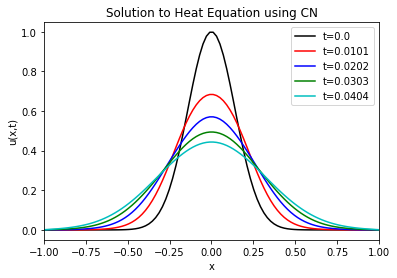

In [3]:
import scipy.sparse as sparse
import scipy.sparse.linalg as linalg

# Compute Heat Equation Solution using Crank-Nicholson
# Spatial discretization
m = 100
x = numpy.linspace(-1.0, 1.0, m)
delta_x = 2.0 / (m - 1.0)
print("delta_x = %s" % delta_x)

# Time discretization - Choose \Delta t based on accuracy constraints
C = 0.5
delta_t = C * delta_x
t = numpy.arange(0.0, 1.0, delta_t)
N = len(t)
print("delta_t = %s" % delta_t)

# Solution array
U = numpy.empty((N + 1, m))

# Initial and boundary conditions
U[0, :] = numpy.exp(-x**2 / 0.2**2)
g_0 = lambda t: 0.0
g_1 = lambda t: 0.0

# Build solving matrix
r = numpy.ones(m) * delta_t / (2.0 * delta_x**2)
A = sparse.spdiags([-r, 1.0 + 2.0 * r, -r], [-1, 0, 1], m, m).tocsr()

# Build matrix for the right hand side computation
# Note that we also have to deal with boundary conditions in the actual loop
# since they could be time dependent
B = sparse.spdiags([r, 1.0 - 2.0 * r, r], [-1, 0, 1],  m, m).tocsr()

# Time stepping loop
for n in range(len(t)-1):
    # Construct right-hand side
    b = B.dot(U[n, :])
    b[0] += delta_t / (2.0 * delta_x**2) * (g_0(t[n]) + g_0(t[n+1]))
    b[-1] += delta_t / (2.0 * delta_x**2) * (g_1(t[n]) + g_1(t[n+1]))
    
    # Solve system
    U[n+1, :] = linalg.spsolve(A, b)

# Plot a few solutions
colors = ['k', 'r', 'b', 'g', 'c']
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
for (i, n) in enumerate((0, 1, 2, 3, 4)):
    axes.plot(x, U[n, :], colors[i], label='t=%s' % numpy.round(t[n], 4))
    axes.set_xlabel("x")
    axes.set_ylabel("u(x,t)")
    axes.set_title("Solution to Heat Equation using CN")
    axes.set_xlim([-1,1])
axes.legend()
plt.show()

This leads to the question of how we consider stability with two varying parameters, $\Delta t$ and $\Delta x$.  The method of lines separates the problem into the consideration of the spatial and temporal problems which is immensely helpful (and we will continue to use this approach).  This however does not tell the complete story as some terms from each approximation may cancel each other out.  This can happen when the Taylor series and the appropriate substitutions from the PDE and its derivatives negate one another.

## Stiffness and the Heat Equation

Recall that the largest eigenvalue of the discrete system for $u_{xx} = f(x)$ behave as $\lambda_m = -4 / \Delta x^2$ while the smallest is $\lambda_1 \approx -\pi^2$.  The stiffness ratio then is approximately
$$
    \frac{\lambda_m}{\lambda_1} \approx \frac{4 \pi^2}{\Delta x^2} \rightarrow \infty \quad \text{as} \quad \Delta x \rightarrow 0.
$$

This stiffness is due to the nature of the heat equation.  The action of the equation is quick for high-frequency data and slow on low-frequency data.  We can see this via a Fourier analysis of the original equation, if we assume $g_0(t) = g_1(t) = 0$ then the solution to the heat equation goes as
$$
    u(x,t) = \sum^\infty_{j=1} \hat{u}_j(t) \sin (j \pi x).
$$
To find the coefficients $\hat{u}_j(t)$ we plug this series into the original PDE to find
$$
    \hat{u}'_j(t) = -j^2 \pi^2 \hat{u}_j(t)
$$
leading to solutions of the form
$$
    \hat{u}_j(t) =  \hat{u}_j(0) e^{-j^2 \pi^2 t}.
$$
Here we see how the original data $\hat{u}_j(0)$, the initial condition, is broken up into its Fourier components with the higher frequencies damped out much faster in time than the lower frequency components.

If we desire the solution to the heat equation over large time periods, say to study what the steady-state might be, we would be in trouble if using time discretization that does not allow for large time steps.  If we choose a discretization that does not have a stability limitation we only need to worry about the accuracy of the method.  For instance, if we wanted the same order of accuracy in space and time we might choose $\Delta t \approx \Delta x$ which we can only do in the instance where we do not have a stability limitation.

## Convergence

We now turn to the question as to how for a given point $(x_i,t_n)$ that our approximation $U^n_i$ is converging to the true solution $u(x_i, t_n)$.  Note now that we have both $\Delta t$ and $\Delta x$ that we want to go to zero.  This in essence creates a sequence of grids in space and time denoted by $(\Delta t_1, \Delta x_1)$, $(\Delta t_2, \Delta x_2)$, etc.

It turns out the relationship between $\Delta t$ and $\Delta x$ that needs to hold for convergence to occur is the same as the stability result we found before.  It is sometimes useful then to think of the convergence criteria as a rule relating $\Delta t$ and $\Delta x$ so in essence we only have one parameter to vary.

While we are at it let's generalize this to a class of methods that can be written as
$$
    U^{n+1} = B(\Delta t) U^n + b^n(\Delta t).
$$
for $B(\Delta t) \in \mathbb R^{m\times m}$ on a grid with $\Delta x = 1 / (m + 1)$ and $b^n(\Delta t) \in \mathbb R^m$.  Here we let $\Delta t \rightarrow 0$ and determine $\Delta x$ from the stability or accuracy relationship between $\Delta t$ and $\Delta x$.

As an example, the forward Euler method presented can be written as 
$$
    U^{n+1} = U^n + \Delta t A U^n \Rightarrow     B(\Delta t) = I + \Delta t A, \quad b^n(\Delta t) = 0
$$ 
where $A$ is the tridiagonal discretization the arises from a second order, centered difference approximation.  

See if you can figure out what the Crank-Nicholson method would be (in $B(\Delta t)$).

For Crank-Nicholson we have
$$
    B(\Delta t) = \left( I - \frac{\Delta t}{2} A \right )^{-1} \left( I + \frac{\Delta t}{2} A \right ).
$$

We now turn to a formal definition of convergence but to do so we need some additional definitions of stability and consistency to show convergence.

A linear method of the form
$$
    U^{n+1} = B(\Delta t) U^n + b^n(\Delta t)
$$
is *Lax-Richtmyer stable* if, for each time $T$, there is a constant $C_T > 0$ such that
$$
    ||B(k)^n|| \leq C_T
$$
for all $\Delta t > 0$ and $n \in \mathbb Z$ for which $\Delta t n \leq T$.

*Lax Equivalence Theorem* - A consistent linear method of the same form is convergent if and only if it is Lax-Richtmyer stable.

The basic idea behind these results are similar to those we saw when looking at Euler's method.  Applying the general linear form to the true solution we find
$$
    u(x, t_{n+1}) = B u(x, t_{n}) + b(t_n) + \Delta t \tau(x, t_n)
$$
where $u$ is a vector evaluated at the spatial points defined by $x \in \mathbb R^m$.  Subtracting this expression by the original linear scheme we find
$$
    U^{n+1} - u(x, t_{n+1}) = B (U^{n} - u(x, t_{n})) - \Delta t \tau^n \\
    E^{n+1} = B E^{n} - \Delta t \tau^n.
$$

After $N$ time steps then we have
$$
    E^N = B^N E^0 - \Delta t \sum^N_{n=1} B^{N - n} \tau^{n-1}.
$$
Using an appropriate norm we then have the relationship
$$
    ||E^N|| \leq ||B^N || ||E^0|| + \Delta t \sum^N_{n=1} ||B^{N - n}||  ||\tau^{n-1}||.
$$

If the method is Lax-Richtmyer stable we then know that for $N \Delta t \leq T$
$$
    ||E^N|| \leq C_T ||E^0|| + T C_T \max_{1 \leq n \leq N} ||\tau^{n-1}||.
$$
As $\Delta t \rightarrow 0$ then this error goes to $0$ as long as the method is consistent ($\tau \rightarrow 0$) and $E^0 \rightarrow 0$.

To make this more concrete consider again the forward Euler discretization where in the 2-norm we know
$$
    ||B(\Delta t)||_2 \leq 1
$$
provided $\Delta t / \Delta x^2 \leq 1 / 2$.  This implies Lax-Richtmyer stability and therefore the method is convergent.

Similarly for the Crank-Nicholson method we see that the method is Lax-Richtmyer stable for any $\Delta t$ and $\Delta x$ choice as the eigenvalues of $B(\Delta t)$ in this case is
$$
    \lambda = \frac{1 + \Delta t \lambda_p / 2}{1 - \Delta t \lambda_p / 2}.
$$

Note finally that for the methods we have considered so far we have had $||B|| \leq 1$ which is called *strong stability*.  In reality Lax-Richtmyer stability is weaker than this and is true if an $\alpha$ can be found such that
$$
    ||B(\Delta t)|| \leq 1 + \alpha \Delta t.
$$

## Von Neumann Analysis

An alternative to the method of lines analysis above is to use Fourier analysis to understand how different numerical modes of the method evolve in time, called *von Neumann analysis*. This generally limits this analysis approach to constant coefficient, linear PDEs but can be an immensely powerful way to analyze a method's stability properties more easily.  For this analysis we also generally analyze the PDE as a *Cauchy problem* to eliminate the issues associated with boundary conditions.

Using the exponential form of the Fourier transform we know that in general the eigenfunctions of a spatial derivative are transformed to algebraic relationships since
$$
    \partial_x e^{i \xi x} = i \xi e^{i \xi x}.
$$
Similarly we know that a discretized version of this eigenfunction
$$
    W_j = e^{i j \Delta x \xi}
$$
for translation-invariant finite difference operators.

For instance let's apply this grid function to the centered, second order finite difference approximation to the first derivative:
$$\begin{aligned}
    D_0 W_j &= \frac{e^{i (j+1) \Delta x \xi} - e^{i (j-1) \Delta x \xi}}{2 \Delta x} \\ 
    &= e^{i j \Delta x \xi} \frac{e^{i \Delta x \xi} - e^{-i \Delta x \xi}}{2 \Delta x} \\
    &=\frac{i}{\Delta x} \sin(\Delta x \xi) e^{i j \Delta x \xi} \\
    &=\frac{i}{\Delta x} \sin(\Delta x \xi) W_j.
\end{aligned}$$
We then know that W_j is an eigenfunction of $D_0$ with a corresponding eigenvalue of $\frac{i}{\Delta x} \sin(\Delta x \xi)$.

One important note about these eigenvalues can be shown by expanding the eigenvalues in a Taylor series to find
$$
    \frac{i}{\Delta x} \sin(\Delta x \xi) = \frac{i}{\Delta x} \left( \Delta x \xi - \frac{1}{6} \Delta x^3 \xi^3 + \cdots \right ) = i \xi - \frac{i}{6} \Delta x^2 \xi^2 + \cdots
$$
which as $\Delta x \rightarrow 0$ agrees with the continuous eigenvalues.

Now suppose that we have another grid function $V_j$ defined at $x_j = j \Delta x$ for $j = 0, \pm 1, \pm 2, \ldots$.  Assume that $V_j$ is an $\ell_2$ function in the sense
$$
    ||U||_2 = \left( \Delta x \sum^\infty_{j=-\infty} |U_j|^2 \right )^{1/2} < \infty.
$$
If this is true we can then take the Fourier transform of the grid function such that
$$
    V_j = \frac{1}{\sqrt{2 \pi}} \int^{\pi/\Delta x}_{-\pi / \Delta x} \hat{V}(\xi) e^{ij \Delta x \xi} d\xi
$$
where the Fourier coefficients are
$$
    \hat{V}(\xi) = \frac{\Delta x}{\sqrt{2 \pi}} \sum^\infty_{j=-\infty} V_j e^{-i j \Delta x \xi}.
$$
Due to Parseval's relation we also know that $||\hat{V}||_2 = ||V||_2$.

Turning back to our original goal, showing stability, we know we need to somehow show that
$$
    \| U^{n+1} \|_2 \leq (1 + \alpha \Delta t) \|U^n\|_2.
$$
Using Perseval's relation we know
$$
    \|\hat{U~}^{n+1}\|_2 \leq (1 + \alpha \Delta t) \|\hat{U~}^n\|_2.
$$
Since we can transform away the discrete spatial operators we can then get at these results more easily than with the original form of the relation.  For instance
$$
    \hat{U~}^{n+1}(\xi) = g(\xi) \hat{U~}^n(\xi)
$$
where now the factor $g(\xi)$ gives the *amplification factor* for a particular wave number $\xi$.  If we can show that
$$
    |g(\xi)| \leq 1 + \alpha \Delta t
$$
where $\alpha$ is independent of $\xi$ then we would have
$$
    |\hat{U~}^{n+1}| \leq (1 + \alpha \Delta t) |\hat{U~}^n|
$$
for all $\xi$ and therefore
$$
    \|\hat{U~}^{n+1}\|_2 \leq (1 + \alpha \Delta t) \|\hat{U~}^n\|_2.
$$

### Example - Forward Euler

Let's consider how our original discretization of the heat equation looks within the framework just developed.  The method was
$$
    U_j^{n+1} = U^n_j + \frac{\Delta t}{\Delta x^2} (U^n_{j+1} - 2 U^n_j + U^n_{j-1} ).
$$
See if you can derive $g(\xi)$ and therefore the stability criteria.

Setting $U^n_j = e^{i j \Delta x \xi}$ we have
$$\begin{aligned}
    U_j^{n+1} &= U^n_j + \frac{\Delta t}{\Delta x^2} (e^{i \Delta x \xi} U^n_j -2 U^n_j + e^{-i \Delta x \xi} U^n_j) \\
    &= \left(1 + \frac{\Delta t}{\Delta x^2} \left(e^{i \Delta x \xi} -2+ e^{-i \Delta x \xi} \right) \right ) U^n_j \\
    &= g(\xi) U^n_j.
\end{aligned}$$
Rewriting the amplification factor slightly we have
$$
    g(\xi) = 1 + 2 \frac{\Delta t}{\Delta x^2} (\cos(\xi \Delta x) - 1)
$$
that, since $-1 \leq \cos (\xi \Delta x) \leq 1$ for all $\xi$ we can bound $g(\xi)$ as 
$$
    1 -4 \frac{\Delta t}{\Delta x^2} \leq g(\xi) \leq 1 \quad \forall \xi.
$$
We therefore know the method is stable if
$$
    \frac{4 \Delta t}{\Delta x^2} \leq 2
$$
as we found before.

### Example - Crank-Nicholson

Again substituting the function $U^n_j = e^{ij\Delta x \xi}$ into the method
$$
    U^{n+1}_j = U^n_j + \frac{\Delta t}{2 \Delta x^2} (U^n_{j-1} - 2 U^n_{j} + U^n_{j+1} + U^{n+1}_{j-1} - 2 U^{n+1}_{j} + U^{n+1}_{j+1})
$$
leads to
$$
    U^{n+1}_j = U^n_j + \frac{\Delta t}{2 \Delta x^2} \left[ \left(e^{i \Delta x \xi} - 2 + e^{-i\Delta x \xi} \right) U^n_{j}+ \left(e^{i \Delta x \xi} - 2 + e^{-i\Delta x \xi} \right) U^{n+1}_{j} \right ]
$$
and therefore
$$
    g(\xi) = 1 + \frac{\Delta t}{2 \Delta x^2} \left(  e^{i \Delta x \xi} - 2 + e^{-i\Delta x \xi} \right ) (1 + g(\xi))
$$
noting that $U^{n+1}_j = g(\xi) U^n_j$ by assumption.

Solving this for the amplification factor leads to
$$
    g = \frac{1+ \frac{z}{2}}{1 - \frac{z}{2}}
$$
where
$$
    z = \frac{\Delta t}{\Delta x^2} \left (e^{i \Delta x \xi} - 2 + e^{-i\Delta x \xi} \right ) = \frac{2 \Delta t}{\Delta x^2} (\cos(\xi \Delta x) - 1).
$$
Observing that $z \leq 0$ for all $\xi$ we then conclude that the method is stable regardless of the choice of $\Delta t $ and $\Delta x$.

## Multiple Spatial Dimensions

We can of course continue our analysis by considering multiple spatial dimensions.  For the heat equation in 2 spatial dimensions we have
$$
    u_t = u_{xx} + u_{yy}
$$
with appropriate two-dimensional initial conditions and boundary conditions.

Using the discrete form of the Laplacian discretization we derived before we can write for instance a Crank-Nicholson method for this PDE as 
$$
    U^{n+1}_{ij} = U^n_{ij} + \frac{\Delta t}{2} \left (\nabla^2_{\Delta x} U^n_{ij} + \nabla^2_{\Delta x} U^{n+1}_{ij} \right)
$$
assuming that $\Delta x = \Delta y$.  In general this forms a system of equations that must be solved that has the structure $A U^{n+1}_{ij} = b$.  To construct the system of equations rewrite the method above as
$$
    \left(I - \frac{\Delta t}{2} \nabla^2_{\Delta x} \right ) U^{n+1}_{ij} = \left(I + \frac{\Delta t}{2} \nabla^2_{\Delta x} \right ) U^{n}_{ij}
$$
so that we have
$$
    A = I - \frac{\Delta t}{2} \nabla^2_{\Delta x} 
$$
and
$$
    b = \left(I + \frac{\Delta t}{2} \nabla^2_{\Delta x} \right ) U^{n}_{ij}.
$$
We can then use our methods for solving the resulting large, sparse linear system at every time step to evolve the system.

In terms of the stability of this method we can compute the eigenvalues of $A$ to find
$$
    \lambda_{p,q} = 1 - \frac{\Delta t}{\Delta x^2} ((\cos(p \pi \Delta x) -1) + (\cos(q \pi \Delta x) - 1))
$$
using our knowledge of the eigenvalues of $\nabla^2_{\Delta x}$.

With these in hand we know a lot about how hard this problem will be to solve.  For instance we know that the largest (in magnitude) eigenvalue will go as $\mathcal{O}(\Delta t / \Delta x^2)$ and the one closest to the origin will go as $\mathcal{O}(\Delta t) + 1$ leading to a condition number for $A$ on the order $\mathcal{O}(\Delta t / \Delta x^2)$.  This is actually nice for us as now $\Delta t$ also effects the condition number of the matrix while before when considering this problem it was only $\mathcal{O}(1 / \Delta x^2)$.

Application of the iterative methods we examined earlier at this stage should work well.  Note that for an initial guess we can use the previous time-step's answer or an explicit time step to extrapolate a guess for the solution.

### Dimensional Splitting

Another approach to discretization of multiple spatial dimensions is to break up the problem into multiple single-spatial dimensional problems.  In other words we would solve a two step process as
$$\begin{aligned}
    U^\ast_{ij} = U^n_{ij} + \frac{\Delta t}{2} (D^2_x U^n_{ij} + D^2_x U^\ast_{ij}) \\
    U^{n+1}_{ij} = U^\ast_{ij} + \frac{\Delta t}{2} (D^2_y U^\ast_{ij} + D^2_y U^{n+1}_{ij}).
\end{aligned}$$
This in effect allows the quantity $U$ to diffuse in the x-direction first and then independently in the y-direction.

Does this work though?  

Ignoring boundary conditions this works as well as the coupled approach from above as $\Delta t \rightarrow 0$!  This comes from the fact that the operators $\partial_{xx}$ and $\partial_{yy}$ commute with each other, a fact we will come back to when considering more general splitting approaches.

What about the boundary conditions though?

Due to the two step process we have introduced another needed set of boundary conditions for $U^\ast$ that need to be specified.  In general what should be used is problem dependent and can be non-trivial to produce.  For instance you might think of the process above as taking a half time-step in one direction and so therefore the boundary values should be evaluated at $t_n + \Delta t / 2$.

Another splitting approach which partially addresses the boundaries is the alternating direction implicit method defined by
$$\begin{aligned}
    U^\ast_{ij} = U^n_{ij} + \frac{\Delta t}{2} (D^2_y U^n_{ij} + D^2_x U^\ast_{ij}) \\
    U^{n+1}_{ij} = U^\ast_{ij} + \frac{\Delta t}{2} (D^2_x U^\ast_{ij} + D^2_y U^{n+1}_{ij})
\end{aligned}$$
which more directly demonstrates the idea that we are predicting the solution in each direction at time $t_n + \Delta t /2$ so here it is consistent to use this as the boundary condition.

## Alternative Discretization Strategies

A number of alternatives can of course be used to solve parabolic PDEs.  Here we have concentrated on using either forward Euler or trapezoidal rule for the time discretization and the centered, second order spatial discretizations but either of these can be replaced by other approaches, some of which may be advantageous for the particular problem.